In [45]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [46]:
train_data = pd.read_csv('_train.csv')
x_test_data = pd.read_csv('_test.csv')

In [47]:
x_train_data = train_data.drop('label', axis=1)

In [48]:
x_train_data.shape

(42000, 784)

In [49]:
y_train_data = train_data['label']

In [50]:
y_train_data.shape

(42000,)

In [51]:
x_test_data.shape

(28000, 784)

In [52]:
x_train = x_train_data.values
x_test = x_test_data.values

In [53]:
x_train.shape

(42000, 784)

In [54]:
x_test.shape

(28000, 784)

In [55]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (42000, 28, 28, 1)
x_test shape: (28000, 28, 28, 1)
Number of images in x_train 42000
Number of images in x_test 28000


In [56]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [67]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [57]:
x_train.shape

(42000, 28, 28, 1)

In [58]:
y_train_data.shape

(42000,)

In [59]:
x_test.shape

(28000, 28, 28, 1)

In [61]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train_data[:10000]
partial_y_train = y_train_data[10000:]

In [68]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

#model.fit(x=x_train,y=y_train_data, epochs=3)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 32000 samples, validate on 10000 samples
Epoch 1/30
32000/32000 [==============================] - 139s 4ms/step - loss: 0.6178 - acc: 0.8262 - val_loss: 0.1559 - val_acc: 0.9549
Epoch 2/30
32000/32000 [==============================] - 136s 4ms/step - loss: 0.1098 - acc: 0.9663 - val_loss: 0.0824 - val_acc: 0.9741
Epoch 3/30
32000/32000 [==============================] - 135s 4ms/step - loss: 0.0698 - acc: 0.9788 - val_loss: 0.0726 - val_acc: 0.9752
Epoch 4/30
32000/32000 [==============================] - 134s 4ms/step - loss: 0.0522 - acc: 0.9838 - val_loss: 0.0531 - val_acc: 0.9816
Epoch 5/30
32000/32000 [==============================] - 134s 4ms/step - loss: 0.0455 - acc: 0.9862 - val_loss: 0.0591 - val_acc: 0.9806
Epoch 6/30
32000/32000 [==============================] - 135s 4ms/step - loss: 0.0364 - acc: 0.9883 - val_loss: 0.0428 - val_acc: 0.9856
Epoch 7/30
32000/32000 [==============================] - 136s 4ms/step - loss: 0.0296 - acc: 0.9908 - val_loss: 0.0431 - 

In [62]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 32000 samples, validate on 10000 samples
Epoch 1/20
32000/32000 [==============================] - 30s 924us/step - loss: 0.7304 - acc: 0.7933 - val_loss: 0.2881 - val_acc: 0.9141
Epoch 2/20
32000/32000 [==============================] - 29s 897us/step - loss: 0.2842 - acc: 0.9149 - val_loss: 0.2006 - val_acc: 0.9408
Epoch 3/20
32000/32000 [==============================] - 29s 905us/step - loss: 0.2142 - acc: 0.9378 - val_loss: 0.1611 - val_acc: 0.9520
Epoch 4/20
32000/32000 [==============================] - 29s 899us/step - loss: 0.1719 - acc: 0.9478 - val_loss: 0.1374 - val_acc: 0.9598
Epoch 5/20
32000/32000 [==============================] - 29s 895us/step - loss: 0.1449 - acc: 0.9569 - val_loss: 0.1194 - val_acc: 0.9643
Epoch 6/20
32000/32000 [==============================] - 29s 900us/step - loss: 0.1248 - acc: 0.9627 - val_loss: 0.1093 - val_acc: 0.9658
Epoch 7/20
32000/32000 [==============================] - 29s 897us/step - loss: 0.1087 - acc: 0.9673 - val_loss: 0.

In [69]:
model.evaluate(x_train, y_train_data)

42000/42000 [==============================] - 116s 3ms/step


[0.01144474932788277, 0.9976904761904762]

In [70]:
resultlist = []
#itemid = 0

for i in range(len(x_test)):
    pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
    #print(*pred, sep = "\n")
    resultlist.append(np.argmax(pred))
    #itemid.append(itemid+1)
    #print(np.argmax(pred))

In [71]:
print(resultlist)

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7, 8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 9, 9, 2, 3, 5, 4, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4, 0, 9, 2, 0, 7, 3, 0, 5, 0, 8, 0, 0, 4, 7, 1, 7, 1, 1, 3, 3, 3, 7, 2, 8, 6, 3, 8, 7, 7, 4, 3, 5, 6, 0, 0, 0, 3, 1, 3, 6, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6, 5, 3, 7, 5, 7, 8, 3, 0, 4, 5, 1, 2, 7, 6, 3, 0, 2, 7, 8, 6, 1, 3, 7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7, 6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 3, 2, 1, 6, 3, 4, 2, 3, 1, 2, 2, 0, 4, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 3, 8, 6, 8, 6, 2, 8, 5, 5, 4, 8, 3, 4, 9, 7, 1, 3, 8, 4, 5, 1, 4, 5, 6, 3, 3, 5, 7, 0, 6, 8, 3, 1, 6, 0, 6, 3, 9, 3, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3, 7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6, 9, 8, 2, 6, 3, 7, 1, 4, 5, 8, 5, 9, 0, 0, 3, 8, 4, 1, 8, 4, 1, 1, 9, 8, 4, 5, 1, 5, 3, 6, 3, 1, 

In [72]:
import csv

resultlist
csvfile = "result.csv"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in resultlist:
        writer.writerow([val])

In [73]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

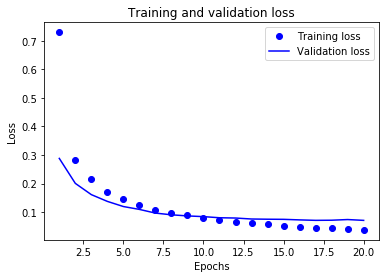

In [65]:
#neural network result
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


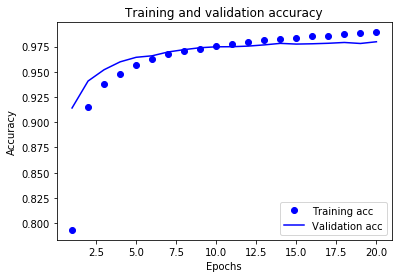

In [66]:
#neural network result
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

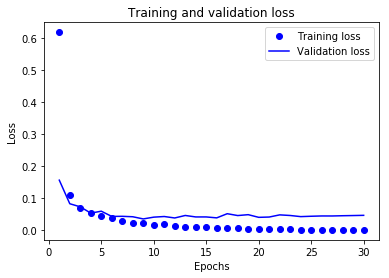

In [74]:
#CNN result
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

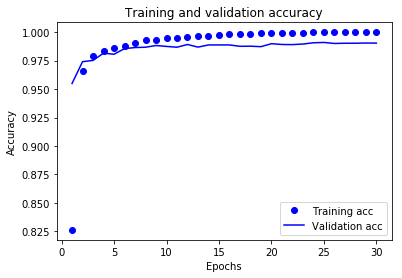

In [75]:
#CNN result
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()